# Problem Set: Explore Many Variables

In [2]:
# load libraries
library(ggplot2)
library(dplyr)
library(reshape2)
theme_set(theme_bw())

# load data
data(diamonds)

### Price Histograms with Facet and Color

Warning message:
"Ignoring unknown parameters: bidwith"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


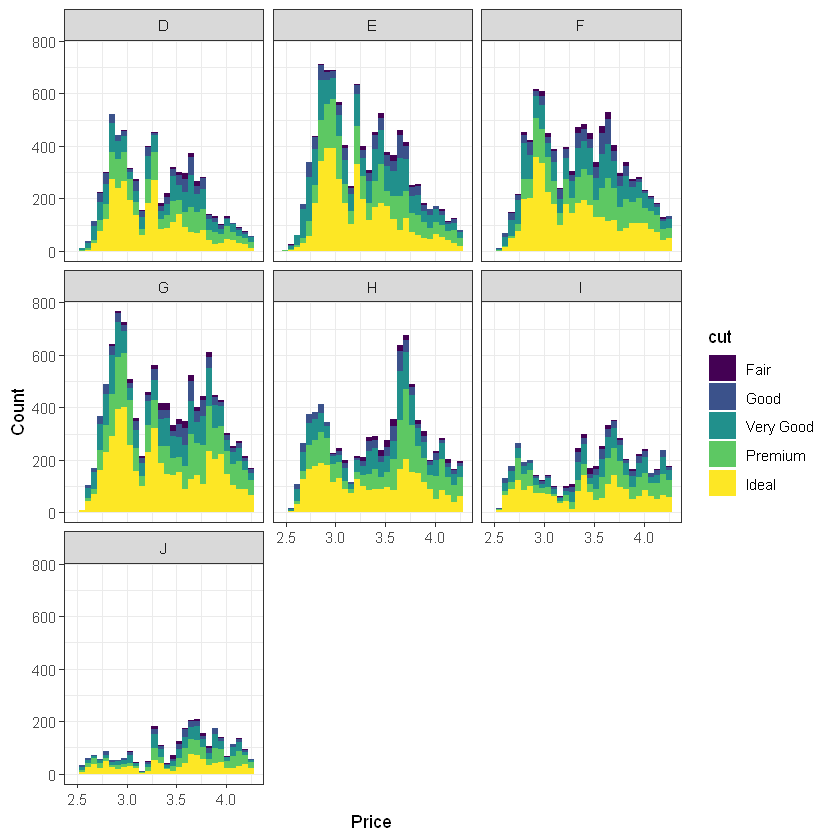

In [3]:
# Create a histogram of diamond prices.
# Facet the histogram by diamond color
# and use cut to color the histogram bars.

# plot
ggplot(aes(x = log10(price), fill = cut), data = diamonds) +
    labs(x = 'Price', y = 'Count') +
    geom_histogram(bidwith = .01) +
    facet_wrap( ~ color)

### Price vs. Table Colored by Cut

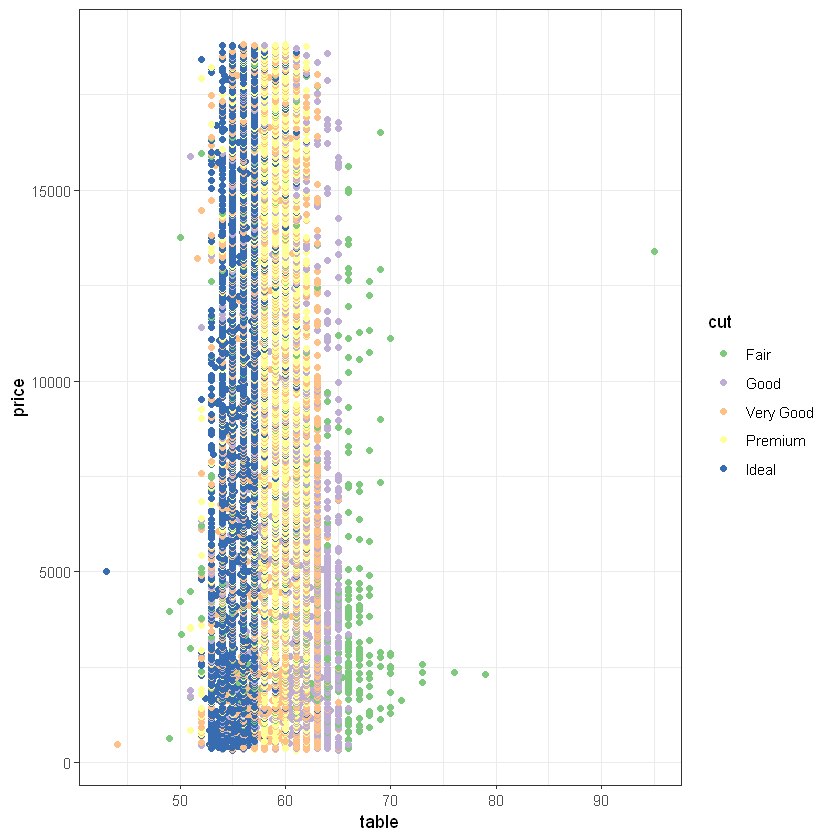

In [4]:
# Create a scatterplot of diamond price vs.
# table and color the points by the cut of
# the diamond.

# plot
ggplot(data = diamonds, aes(x = table, y = price)) +
    geom_point(aes(color = cut)) +
    scale_color_brewer(type = 'qual')

### Typical Table Value

### Price vs. Volume and Diamond Clarity

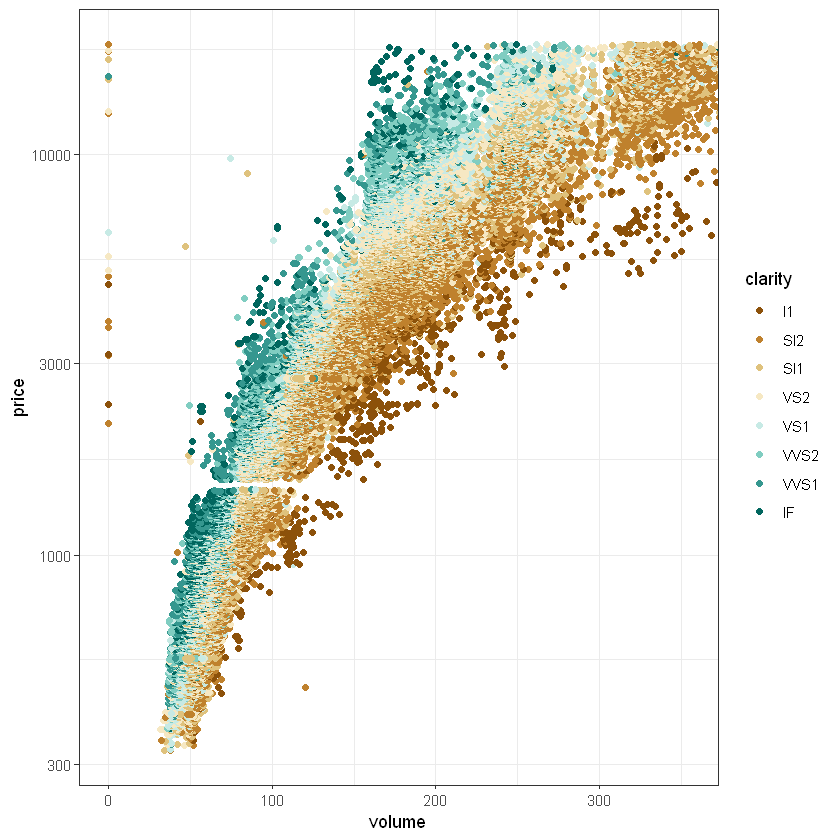

In [5]:
# Create a scatterplot of diamond price vs.
# volume (x * y * z) and color the points by
# the clarity of diamonds. Use scale on the y-axis
# to take the log10 of price. You should also
# omit the top 1% of diamond volumes from the plot.

# Note: Volume is a very rough approximation of
# a diamond's actual volume.

volume <- diamonds$x * diamonds$y * diamonds$z

ggplot(data = diamonds, aes(x = volume, y = price)) +
    geom_point(aes(color = clarity)) +
    scale_y_log10() +
    coord_cartesian(xlim = c(0, quantile(volume, 0.99))) +
    scale_color_brewer(type = 'div')

### Proportion of Friendships Initiated

In [6]:
# Many interesting variables are derived from two or more others.
# For example, we might wonder how much of a person's network on
# a service like Facebook the user actively initiated. Two users
# with the same degree (or number of friends) might be very
# different if one initiated most of those connections on the
# service, while the other initiated very few. So it could be
# useful to consider this proportion of existing friendships that
# the user initiated. This might be a good predictor of how active
# a user is compared with their peers, or other traits, such as
# personality (i.e., is this person an extrovert?).

# Your task is to create a new variable called 'prop_initiated'
# in the Pseudo-Facebook data set. The variable should contain
# the proportion of friendships that the user initiated.

pf <- read.csv('pseudo_facebook.tsv', sep = '\t')
pf$prop_initiated <- pf$friendships_initiated / pf$friend_count

In [7]:
pf$prop_initiated[is.nan(pf$prop_initiated)] <- 0

### prop_initiated vs. tenure

Warning message:
"Removed 2 rows containing non-finite values (stat_summary)."

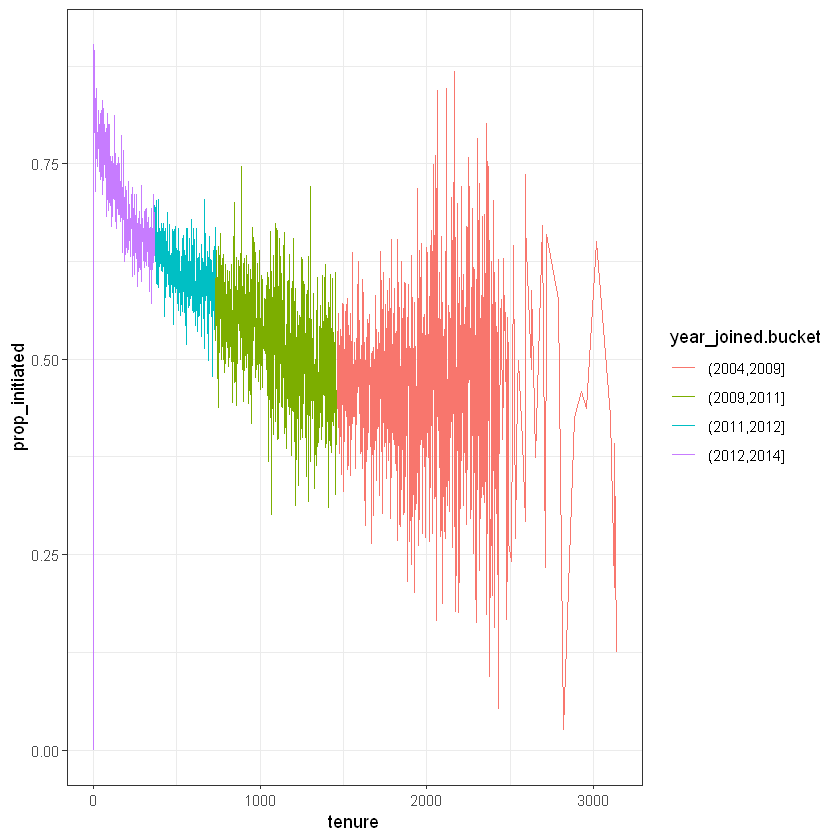

In [8]:
# Create a line graph of the median proportion of
# friendships initiated ('prop_initiated') vs.
# tenure and color the line segment by
# year_joined.bucket.

# Recall, we created year_joined.bucket in Lesson 5
# by first creating year_joined from the variable tenure.
# Then, we used the cut function on year_joined to create
# four bins or cohorts of users.

# (2004, 2009]
# (2009, 2011]
# (2011, 2012]
# (2012, 2014]

# returns the largest integer not greater than the giving number.
pf$year_joined <- floor(2014 - (pf$tenure / 365))

# cut divides the range of x into intervals and codes the values in x according to which interval they fall. 
# The leftmost interval corresponds to level one, the next leftmost to level two and so on.
pf$year_joined.bucket <- cut(pf$year_joined, c(2004, 2009, 2011, 2012, 2014))

ggplot(aes(x = tenure, y = prop_initiated),
       data = pf) +
  geom_line(aes(color = year_joined.bucket), stat = 'summary', 
            fun.y = median)

### Smoothing prop_initiated vs. tenure

Warning message:
"Removed 2 rows containing non-finite values (stat_summary)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."

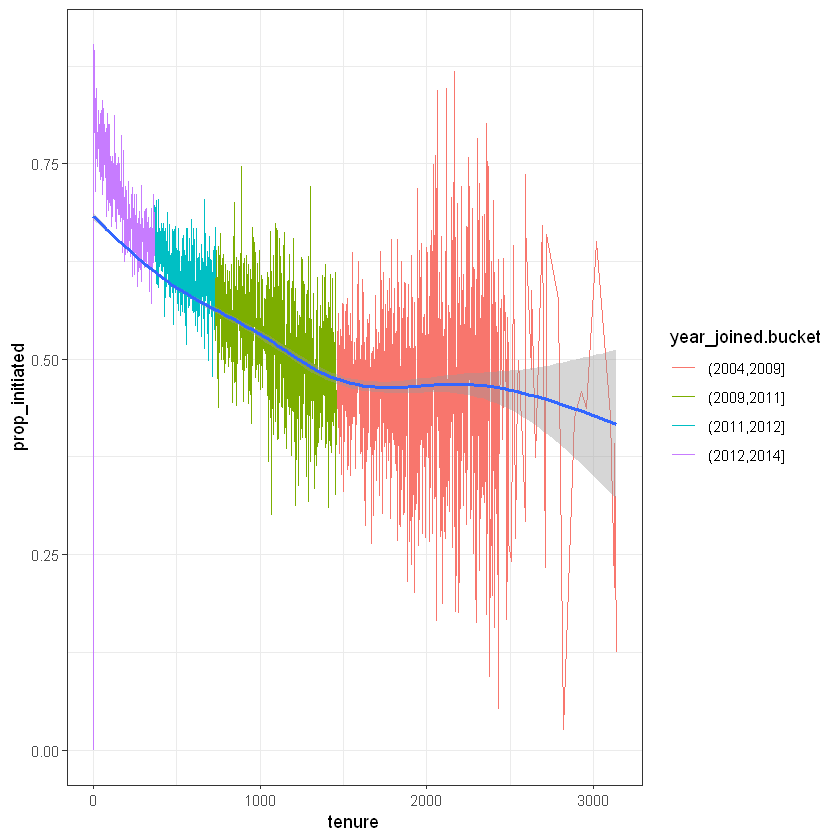

In [9]:
# Smooth the last plot you created of
# of prop_initiated vs tenure colored by
# year_joined.bucket. You can bin together ranges
# of tenure or add a smoother to the plot.

ggplot(aes(x = tenure, y = prop_initiated), data = pf) +
  geom_line(aes(color = year_joined.bucket), stat = 'summary', fun.y = median) +
  geom_smooth()

### Greatest prop_initiated Group

In [10]:
# Which group initiated the greatest proportion of its Facebook frinedships
# people who joined prior to 2009
# people who joined 2009-2011
# people who joined 2011 - 2012
# people who joined after 2012

by(pf$prop_initiated, pf$year_joined.bucket, summary)

pf$year_joined.bucket: (2004,2009]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3415  0.4669  0.4665  0.5909  1.0000 
------------------------------------------------------------ 
pf$year_joined.bucket: (2009,2011]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3894  0.5342  0.5273  0.6744  1.0000 
------------------------------------------------------------ 
pf$year_joined.bucket: (2011,2012]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4500  0.6154  0.5911  0.7600  1.0000 
------------------------------------------------------------ 
pf$year_joined.bucket: (2012,2014]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5000  0.6912  0.6430  0.8438  1.0000 

### Largest Group Mean prop_initiated

In [13]:
# For the group with the largest proportion of friendships initiated, what is the group's average (mean) proportion of friendships initiated?
summary(pf$friendships_initiated)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    17.0    46.0   107.5   117.0  4144.0 

### Price/Carat Binned, Faceted, & Colored

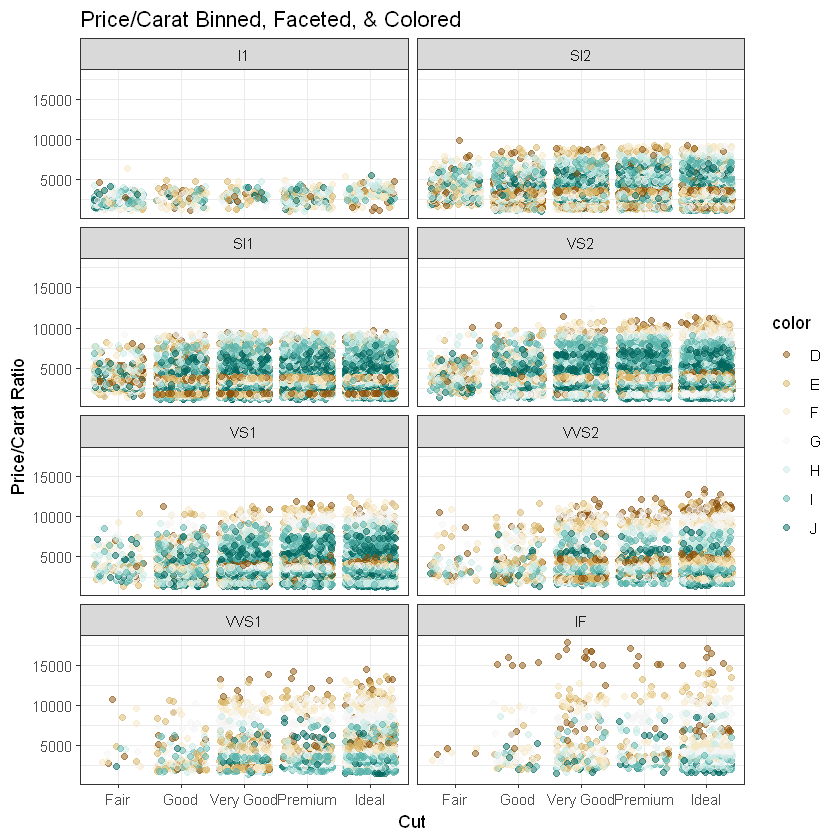

In [15]:
# Create a scatter plot of the price/carat ratio
# of diamonds. The variable x should be
# assigned to cut. The points should be colored
# by diamond color, and the plot should be
# faceted by clarity.

ggplot(aes(x = cut, y = price/carat),
       data = diamonds) +
  labs(x = 'Cut', y = 'Price/Carat Ratio',
       title = 'Price/Carat Binned, Faceted, & Colored') +
  geom_point(aes(color = color), position = 'jitter',
             alpha = 0.5) +
  scale_color_brewer(type = 'div') +
  facet_wrap( ~ clarity, ncol = 2)